In [1]:
import numpy as np
import json


def load_results(filename):
    with open(f"results/{filename}.json", "r") as json_file:
        data = json.load(json_file)
    return data

def summarize(res):
    values = {}
    for key in res.keys():
        accs = [r_val["test_acc"] for r_val in res[key].values()]
        iters = [r_val["iterations"] for r_val in res[key].values()]
        m_accs, m_iters = round(np.mean(accs), 4), np.mean(iters)
        values[key] = m_accs, m_iters
    return values


def summarize_average(res_list):
    res_list = [summarize(rs) for rs in res_list]
    res = {k: tuple() for k in res_list[0].keys()}
    for k in res.keys():
        res[k] = (np.mean([rl[k][0] for rl in res_list]), np.mean([rl[k][1] for rl in res_list]))
    return res


In [2]:
results = summarize_average([load_results(f"conv1d_results_individual_{_}") for _ in range(5)])
ratios = [float(k) for k in results.keys()]
for r in ratios:
    print(r, "&", int(r * 5400 * 0.6), "&", int(r * 5400 * 0.6)*4, "\\\\")

0.001 & 3 & 12 \\
0.005 & 16 & 64 \\
0.01 & 32 & 128 \\
0.025 & 81 & 324 \\
0.05 & 162 & 648 \\
0.1 & 324 & 1296 \\
0.2 & 648 & 2592 \\
0.3 & 972 & 3888 \\
0.4 & 1296 & 5184 \\
0.5 & 1620 & 6480 \\
0.6 & 1944 & 7776 \\
0.7 & 2267 & 9068 \\
0.8 & 2592 & 10368 \\
0.9 & 2916 & 11664 \\
1.0 & 3240 & 12960 \\


In [3]:
results = summarize_average([load_results(f"conv1d_results_individual_{_}") for _ in range(5)])
kan_results = summarize_average([load_results(f"kan_results_individual_{_}") for _ in range(5)])
bn_results = summarize_average([load_results(f"bn_results_individual_{_}") for _ in range(5)])
kan_bn_results = summarize_average([load_results(f"kan-bn_results_individual_{_}") for _ in range(5)])


results_ft = summarize_average([load_results(f"conv1d_results_ft_{_}") for _ in range(5)])
kan_results_ft = summarize_average([load_results(f"kan_results_ft_{_}") for _ in range(5)])
bn_results_ft = summarize_average([load_results(f"bn_results_ft_{_}") for _ in range(5)])
kan_bn_results_ft = summarize_average([load_results(f"kan-bn_results_ft_{_}") for _ in range(5)])

results_tl = summarize_average([load_results(f"conv1d_results_tl_{_}") for _ in range(5)])
kan_results_tl = summarize_average([load_results(f"kan_results_tl_{_}") for _ in range(5)])
bn_results_tl = summarize_average([load_results(f"bn_results_tl_{_}") for _ in range(5)])
kan_bn_results_tl = summarize_average([load_results(f"kan-bn_results_tl_{_}") for _ in range(5)])


bn_results_bn_ft = summarize_average([load_results(f"bn_results_bn-ft_{_}") for _ in range(5)])

In [4]:
import pandas as pd

def as_df(res, index=None):
    df = pd.DataFrame(res, index=['Accuracy', 'Iterations'])
    if index:
        df = df.drop(list(df.index)[index[0]])
        return df.rename(index={list(df.index)[0]: index[1]})

def build_df(col_ind):
    float_formats = ["%.0f", "%.2f"]
    df_conv1d = as_df(results, [col_ind, "Conv1D"])
    df_conv1d_ft = as_df(results_ft, [col_ind, "Conv1D-FT"])
    df_conv1d_tl = as_df(results_tl, [col_ind, "Conv1D-TL"])

    df_bn = as_df(bn_results, [col_ind, "Conv1D-BN"])
    df_bn_ft = as_df(bn_results_ft, [col_ind, "Conv1D-BN-FT"])
    df_bn_tl = as_df(bn_results_tl, [col_ind, "Conv1D-BN-TL"])
    df_bn_bn_ft = as_df(bn_results_bn_ft, [col_ind, "Conv1D-BN(BN-FT)"])


    df_kan = as_df(kan_results, [col_ind, "Conv1D-KAN"])
    df_kan_ft = as_df(kan_results_ft, [col_ind, "Conv1D-KAN-FT"])
    df_kan_tl = as_df(kan_results_tl, [col_ind, "Conv1D-KAN-TL"])

    df_kan_bn = as_df(kan_results, [col_ind, "Conv1D-KAN-BN"])
    df_kan_bn_ft = as_df(kan_results_ft, [col_ind, "Conv1D-KAN-BN-FT"])
    df_kan_bn_tl = as_df(kan_results_tl, [col_ind, "Conv1D-KAN-BN-TL"])
    
    df_kan_bn = as_df(kan_bn_results, [col_ind, "Conv1D-KAN-BN"])
    

    df = pd.concat([df_conv1d, df_conv1d_ft, df_conv1d_tl,
                    df_bn, df_bn_ft, df_bn_tl, df_bn_bn_ft, 
                    df_kan, df_kan_ft, df_kan_tl,
                    df_kan_bn, df_kan_bn_ft, df_kan_bn_tl
                   ], axis=0)
    if col_ind == 1:
        df = df.round(2)
    else:
        df = df.round(0)
    print(df.to_latex(index=True, float_format=float_formats[col_ind]))
    return df

df_acc = build_df(1)
df_iter = build_df(0)


\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
{} &  0.001 &  0.005 &  0.01 &  0.025 &  0.05 &  0.1 &  0.2 &  0.3 &  0.4 &  0.5 &  0.6 &  0.7 &  0.8 &  0.9 &    1 \\
\midrule
Conv1D           &   0.43 &   0.58 &  0.43 &   0.86 &  0.94 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Conv1D-FT        &   0.48 &   0.59 &  0.42 &   0.87 &  0.96 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Conv1D-TL        &   0.48 &   0.59 &  0.42 &   0.87 &  0.96 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Conv1D-BN        &   0.42 &   0.64 &  0.70 &   0.82 &  0.95 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Conv1D-BN-FT     &   0.34 &   0.51 &  0.52 &   0.66 &  0.86 & 0.96 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Conv1D-BN-TL     &   0.38 &   0.54 &  0.51 &   0.74 &  0.89 & 0.95 & 0.98 & 0.99 & 0.99 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
Conv1D-BN(BN-FT) &   0.28 &   0

In [5]:
df_acc

,0.001,0.005,0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
Conv1D,0.43,0.58,0.43,0.86,0.94,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-FT,0.48,0.59,0.42,0.87,0.96,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-TL,0.48,0.59,0.42,0.87,0.96,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-BN,0.42,0.64,0.70,0.82,0.95,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-BN-FT,0.34,0.51,0.52,0.66,0.86,0.96,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-BN-TL,0.38,0.54,0.51,0.74,0.89,0.95,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00
Conv1D-BN(BN-FT),0.28,0.30,0.29,0.29,0.33,0.62,0.83,0.86,0.87,0.87,0.88,0.88,0.88,0.88,0.89
Conv1D-KAN,0.43,0.59,0.51,0.87,0.97,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-KAN-FT,0.34,0.51,0.43,0.69,0.84,0.96,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Conv1D-KAN-TL,0.34,0.48,0.43,0.63,0.83,0.93,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [6]:
df_iter.min()

0.001      12.0
0.005      83.0
0.01       25.0
0.025      61.0
0.05      316.0
0.1      1206.0
0.2      2186.0
0.3      3042.0
0.4      4485.0
0.5      4139.0
0.6      5398.0
0.7      6014.0
0.8      7140.0
0.9      6414.0
1        7755.0
dtype: float64

In [7]:
def build_iter_acc_data(df_acc, df_iter):
    max_row_values = df_acc.idxmax(axis=1)

    vals = list(zip(df_acc.lookup(df_acc.index, max_row_values), df_iter.lookup(df_acc.index, max_row_values)))

    names = [f'{index} ({value})' for index, value in zip(max_row_values.index, max_row_values.values)]

    return {key: value for key, value in zip(names, vals)}

/tmp/ipykernel_2879526/3634551123.py:4: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  vals = list(zip(df_acc.lookup(df_acc.index, max_row_values), df_iter.lookup(df_acc.index, max_row_values)))


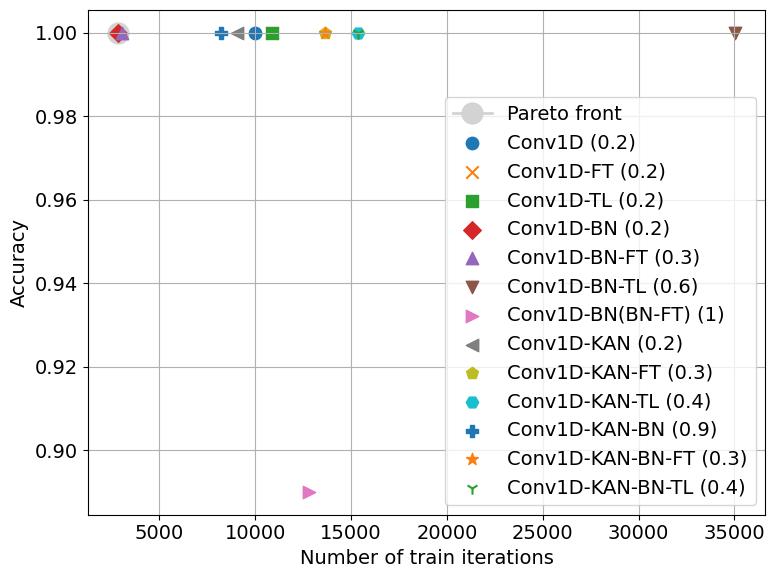

In [21]:

import matplotlib.pyplot as plt

def pareto_front(df_acc, df_iter, title=None, fig_name=None):
    data = build_iter_acc_data(df_acc, df_iter)

    sorted_data = dict(sorted(data.items(), key=lambda item: item[1][0], reverse=True))

    def is_dominated(point, point_data):
        for other_point in point_data:
            if (
                    other_point[0] >= point[0] and other_point[1] <= point[1]
                    and (other_point[0] > point[0] or other_point[1] < point[1])
            ):
                return False
        return True

    pf = [point for point in list(sorted_data.values()) if is_dominated(point, list(sorted_data.values()))]
    pareto_y, pareto_x = zip(*pf)

    plt.rcParams.update({'font.size': 14})
    plt.plot(pareto_x, pareto_y, c='lightgray', label='Pareto front', marker='o', markersize=15, linewidth=2, zorder=-1)

    marker_styles = ['o', 'x', 's', 'D', '^', 'v', '>', '<', 'p', 'H', 'P', '*', '1']
    for i, (k, v) in enumerate(data.items()):
        plt.scatter(v[1], v[0], marker=marker_styles[i], s=80, label=k)

    plt.ylabel('Accuracy')
    plt.xlabel('Number of train iterations')
    if title:
        plt.title(title)
    plt.gcf().set_size_inches(6*1.333, 6)
    plt.legend()
    # plt.gca().invert_xaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"pareto_front.pdf")
    
pareto_front(df_acc, df_iter)